## Import them all

In [1]:
import numpy as np
import torch

from PIL import Image
from argparse import ArgumentParser

from torch.optim import SGD, Adam
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import Compose, CenterCrop, Normalize
from torchvision.transforms import ToTensor, ToPILImage


from piwise.network import UNet
from piwise.criterion import CrossEntropyLoss2d
from piwise.transform import Relabel, ToLabel, Colorize

## Setup the model

In [2]:
NUM_CHANNELS = 2
NUM_CLASSES = 2

Net = UNet
model = Net(NUM_CLASSES)
model = model.cuda()




# Load the Data

In [3]:
in_vals = torch.from_numpy(np.load('data/inputs.npy'))
out_vals = torch.from_numpy(np.load('data/outputs.npy')).long()
out_vals[out_vals==2]=0
loader = DataLoader(TensorDataset(in_vals,out_vals), shuffle=True)

In [7]:
images, labels = next(iter(loader))

In [9]:
images.size()

torch.Size([1, 2, 512, 512])

In [10]:
labels.size()

torch.Size([1, 512, 512])

In [15]:
labels.min()

0


( 0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.LongTensor of size 1x512x512]

## Train the model

In [4]:
model.train()
weight = torch.ones(NUM_CLASSES)
weight[0] = 0      
criterion = CrossEntropyLoss2d()
optimizer = Adam(model.parameters())
epoch_loss = []
for epoch in range(1, 201):
    

    for step, (images, labels) in enumerate(loader):
        images = images.cuda()
        labels = labels.cuda()

        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)

        loss.backward()
        optimizer.step()
        
        epoch_loss.append((loss.data[0]))
print("Training complete.")

/opt/conda/envs/pytorch-py36/lib/python3.6/site-packages/torch/nn/functional.py:807: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


Training complete.


In [85]:
import matplotlib.pyplot as plt

In [101]:
plt.plot(epoch_loss)

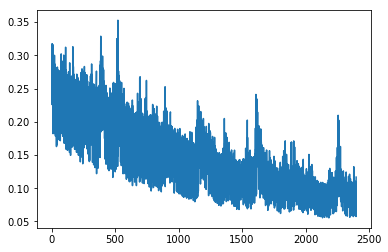

In [102]:
plt.show()

In [88]:
plt.close()

In [89]:
plt

<module 'matplotlib.pyplot' from '/opt/conda/envs/pytorch-py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [90]:
plt.show()

In [93]:
total_loss[0]

[0.3048296570777893,
 0.26992830634117126,
 0.21971377730369568,
 0.3078896999359131,
 0.25278031826019287,
 0.315354585647583,
 0.32046425342559814,
 0.2827519178390503,
 0.2295074164867401,
 0.24371883273124695,
 0.24803948402404785,
 0.3288705050945282]

In [95]:
for data in total_loss:
    total_loss[total_loss.index(data)]=(sum(data)/len(data))

In [96]:
total_loss

[0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.27698739618062973,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.278233269850413,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2756763584911823,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682621638,
 0.2734686682

In [97]:
len(total_loss)

240

In [100]:
len(epoch_loss)

2400

In [103]:
plt.close()

In [1]:
print("")

In [2]:
outputs

NameError: name 'outputs' is not defined

In [8]:
loss

Variable containing:
 0.2872
[torch.cuda.FloatTensor of size 1 (GPU 0)]

In [9]:
len(outputs)

1

In [10]:
outputs

Variable containing:
( 0 , 0 ,.,.) = 
    0.0000    0.0000    0.0000  ...    -0.0001   -0.0003   -0.0002
    0.0000    0.0000    0.0000  ...    -0.0001   -0.0003   -0.0002
    0.0000    0.0000    0.0000  ...    -0.0002   -0.0004   -0.0002
              ...                ⋱                ...             
    0.0000    0.0000   -0.0099  ...    -0.0006   -0.0001   -0.0000
    0.0000    0.0000   -0.0058  ...    -0.0005   -0.0001   -0.0000
    0.0000    0.0000   -0.0027  ...    -0.0006   -0.0001   -0.0000

( 0 , 1 ,.,.) = 
 -130.6586 -141.0657 -134.0111  ...    -9.1870   -8.1220   -8.5708
 -137.8547 -152.5382 -145.0304  ...    -9.2002   -8.0936   -8.4820
 -135.6483 -151.1954 -140.7107  ...    -8.6472   -7.8555   -8.6487
              ...                ⋱                ...             
  -19.7559  -15.4810   -4.6197  ...    -7.5016   -9.6865  -11.3605
  -19.7216  -15.4697   -5.1476  ...    -7.6631   -9.7064  -11.1755
  -21.6215  -16.5262   -5.9275  ...    -7.4841   -9.7662  -11.1235
[torch

In [11]:
len(inputs)

1

In [12]:
inputs

Variable containing:
( 0 , 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 0 , 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 1x2x512x512 (GPU 0)]

In [13]:
targets

Variable containing:
( 0 ,.,.) = 
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
     ...       ⋱       ...    
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
   0   0   0  ...    0   0   0
[torch.cuda.LongTensor of size 1x512x512 (GPU 0)]

In [14]:
import matplotlib.pyplot as plt

In [5]:
inputs

Variable containing:
( 0 , 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 0 , 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 1x2x512x512 (GPU 0)]

In [6]:
inputs[0]

Variable containing:
( 0 ,.,.) = 
  0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
  0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
  0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
           ...             ⋱             ...          
  0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
  0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
  0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530

( 1 ,.,.) = 
  0.4783  0.4233  0.4500  ...   0.4545  0.4249  0.4490
  0.4639  0.3432  0.3035  ...   0.3488  0.3121  0.3701
  0.5631  0.4173  0.4311  ...   0.3310  0.3266  0.4557
           ...             ⋱             ...          
  0.4726  0.2140  0.1481  ...   0.1745  0.1864  0.3762
  0.4949  0.3478  0.2687  ...   0.3350  0.3699  0.4450
  0.5542  0.4825  0.4621  ...   0.5327  0.5453  0.5602
[torch.cuda.FloatTensor of size 2x512x512 (GPU 0)]

In [7]:
inputs[0][0]

Variable containing:
 0.1632  0.1664  0.1764  ...   0.1536  0.1438  0.1428
 0.1538  0.1632  0.1749  ...   0.1408  0.1446  0.1372
 0.1586  0.1630  0.1641  ...   0.1696  0.1510  0.1520
          ...             ⋱             ...          
 0.1668  0.1710  0.1720  ...   0.1564  0.1589  0.1511
 0.1673  0.1688  0.1823  ...   0.1557  0.1536  0.1516
 0.1672  0.1700  0.1710  ...   0.1542  0.1555  0.1530
[torch.cuda.FloatTensor of size 512x512 (GPU 0)]

In [11]:
inputs.numpy()

AttributeError: numpy

In [12]:
type(epoch_loss)

list

In [14]:
import torchvision.transforms as transforms